In [81]:
import pandas as pd
import seaborn as sns
import numpy as np

In [82]:
df = pd.read_csv('movies.csv', sep=';', thousands=',')
df.head()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,1972,R,175 min,Comedy,9.2,1860471,$134.97M
1,2.0,The Silence of the Lambs,1991,R,118 min,Crime,8.6,1435344,$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,1980,PG,124 min,Fantasy,8.7,1294805,$290.48M
3,4.0,The Shawshank Redemption,1994,R,142 min,Drama,9.3,2683302,$28.34M
4,5.0,The Shining,1980,R,146 min,Horror,8.4,1025560,$44.02M


In [83]:
df.isna().sum()

index              0
movie_name         0
year_of_release    0
category           0
run_time           0
genre              0
imdb_rating        0
votes              0
gross_total        1
dtype: int64

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['genre'])
print(df_train.shape, df_test.shape)

(70, 9) (30, 9)


In [86]:
# df_train has 70 rows and 9 columns
# df_test has 30 rows and 9 columns

In [87]:
df.corr() # to find out which features correlate

,index,year_of_release,imdb_rating,votes
index,1.000000,0.307025,-0.462513,-0.361272
year_of_release,0.307025,1.000000,-0.054700,0.423323
imdb_rating,-0.462513,-0.054700,1.000000,0.666751
votes,-0.361272,0.423323,0.666751,1.000000


In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
features= ['imdb_rating', 'votes']
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(df_train[features], df_train['imdb_rating'])

DecisionTreeRegressor(max_depth=3)

In [90]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [91]:
predictionsOnTrainset = dt_regression.predict(df_train[features])
predictionsOnTestset = dt_regression.predict(df_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, df_train.imdb_rating)
rmseTest = calculate_rmse(predictionsOnTestset, df_test.imdb_rating)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 0.05734883511361735
RMSE on test set 0.11159671662057893


In [92]:
# RMSE measures the average difference between the predicted values and the actual values in a dataset

In [93]:
# Yes, the RMSE on the test set has a higher value. I did expect this difference, because 
# on a test set it would make more sense that the value would be higher because of new 
# values that are not trained.

In [94]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

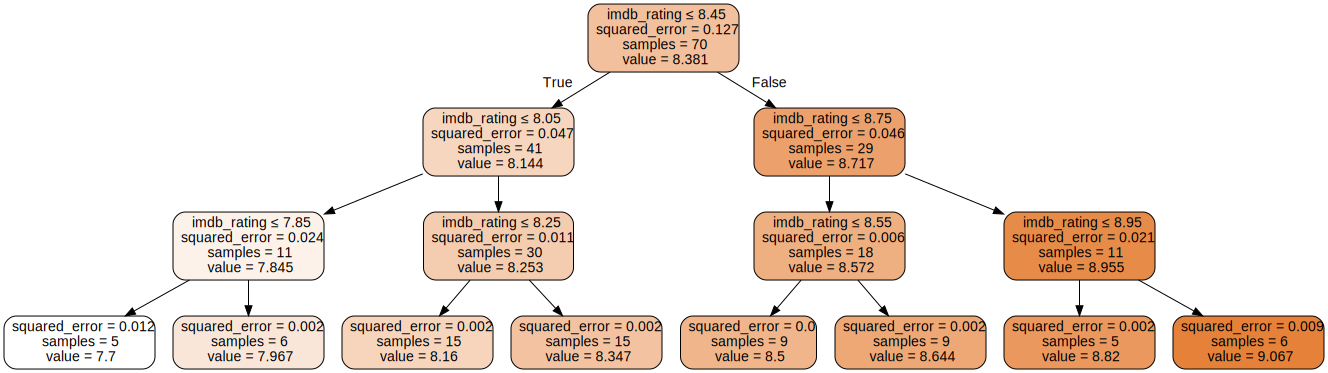

In [95]:
plot_tree_regression(dt_regression, features)

In [96]:
# Yes, it compares the imdb_rating and puts it to the left if its true, 
# and right if false. After that it calculates the values then the same riddle goes on.